## Breast Cancer Prediction (Logistic Regression)

#### Kumar Kishalaya



In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

###  1.Data Exploration and Visualization

- Explore the Breast Cancer Dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
- Include any other plots you find interesting and provide brief interpretations.

In [3]:
# Read the dataframe
df = pd.read_csv('Cancer.csv')

### 1-1. Explore the Dataset 
#### (Data Understanding)

In [4]:
df.shape #shape of the dataframe

(569, 33)

In [5]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
## Checking for the data types for all the columns
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
# Checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Dropping the unnecessary column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop(columns='id',inplace=True)
# Removing space from the column names
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# checking for duplicated values
df.loc[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst


### 1-2. Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.

In [11]:
## Find the count for each class in the target variable
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
## Encoding the target label with appropriate values (Malignant =1, Benign =0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

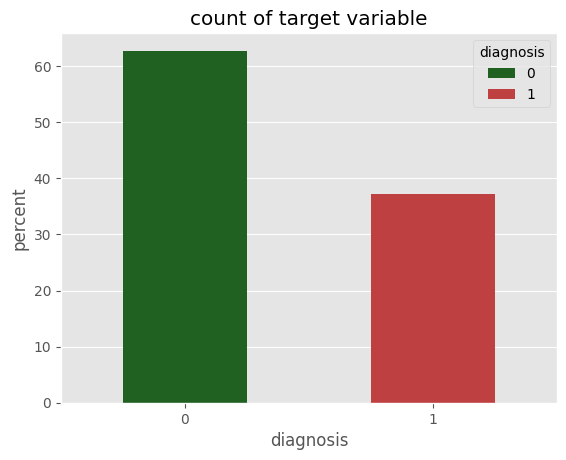

In [13]:
# Exploring the target variable

sns.countplot(x=df['diagnosis'],hue=df['diagnosis'] ,palette=["green","red"],width=0.5,saturation=0.5,stat='percent')
plt.title('count of target variable')
plt.show()

##### Observation
##### About 60% of the data is class 0 (Benign) and 40% is class 1 (Malignant)

#### Running a box plot test to see if the distribution of each of the variables are differnt for each of our target variable class.

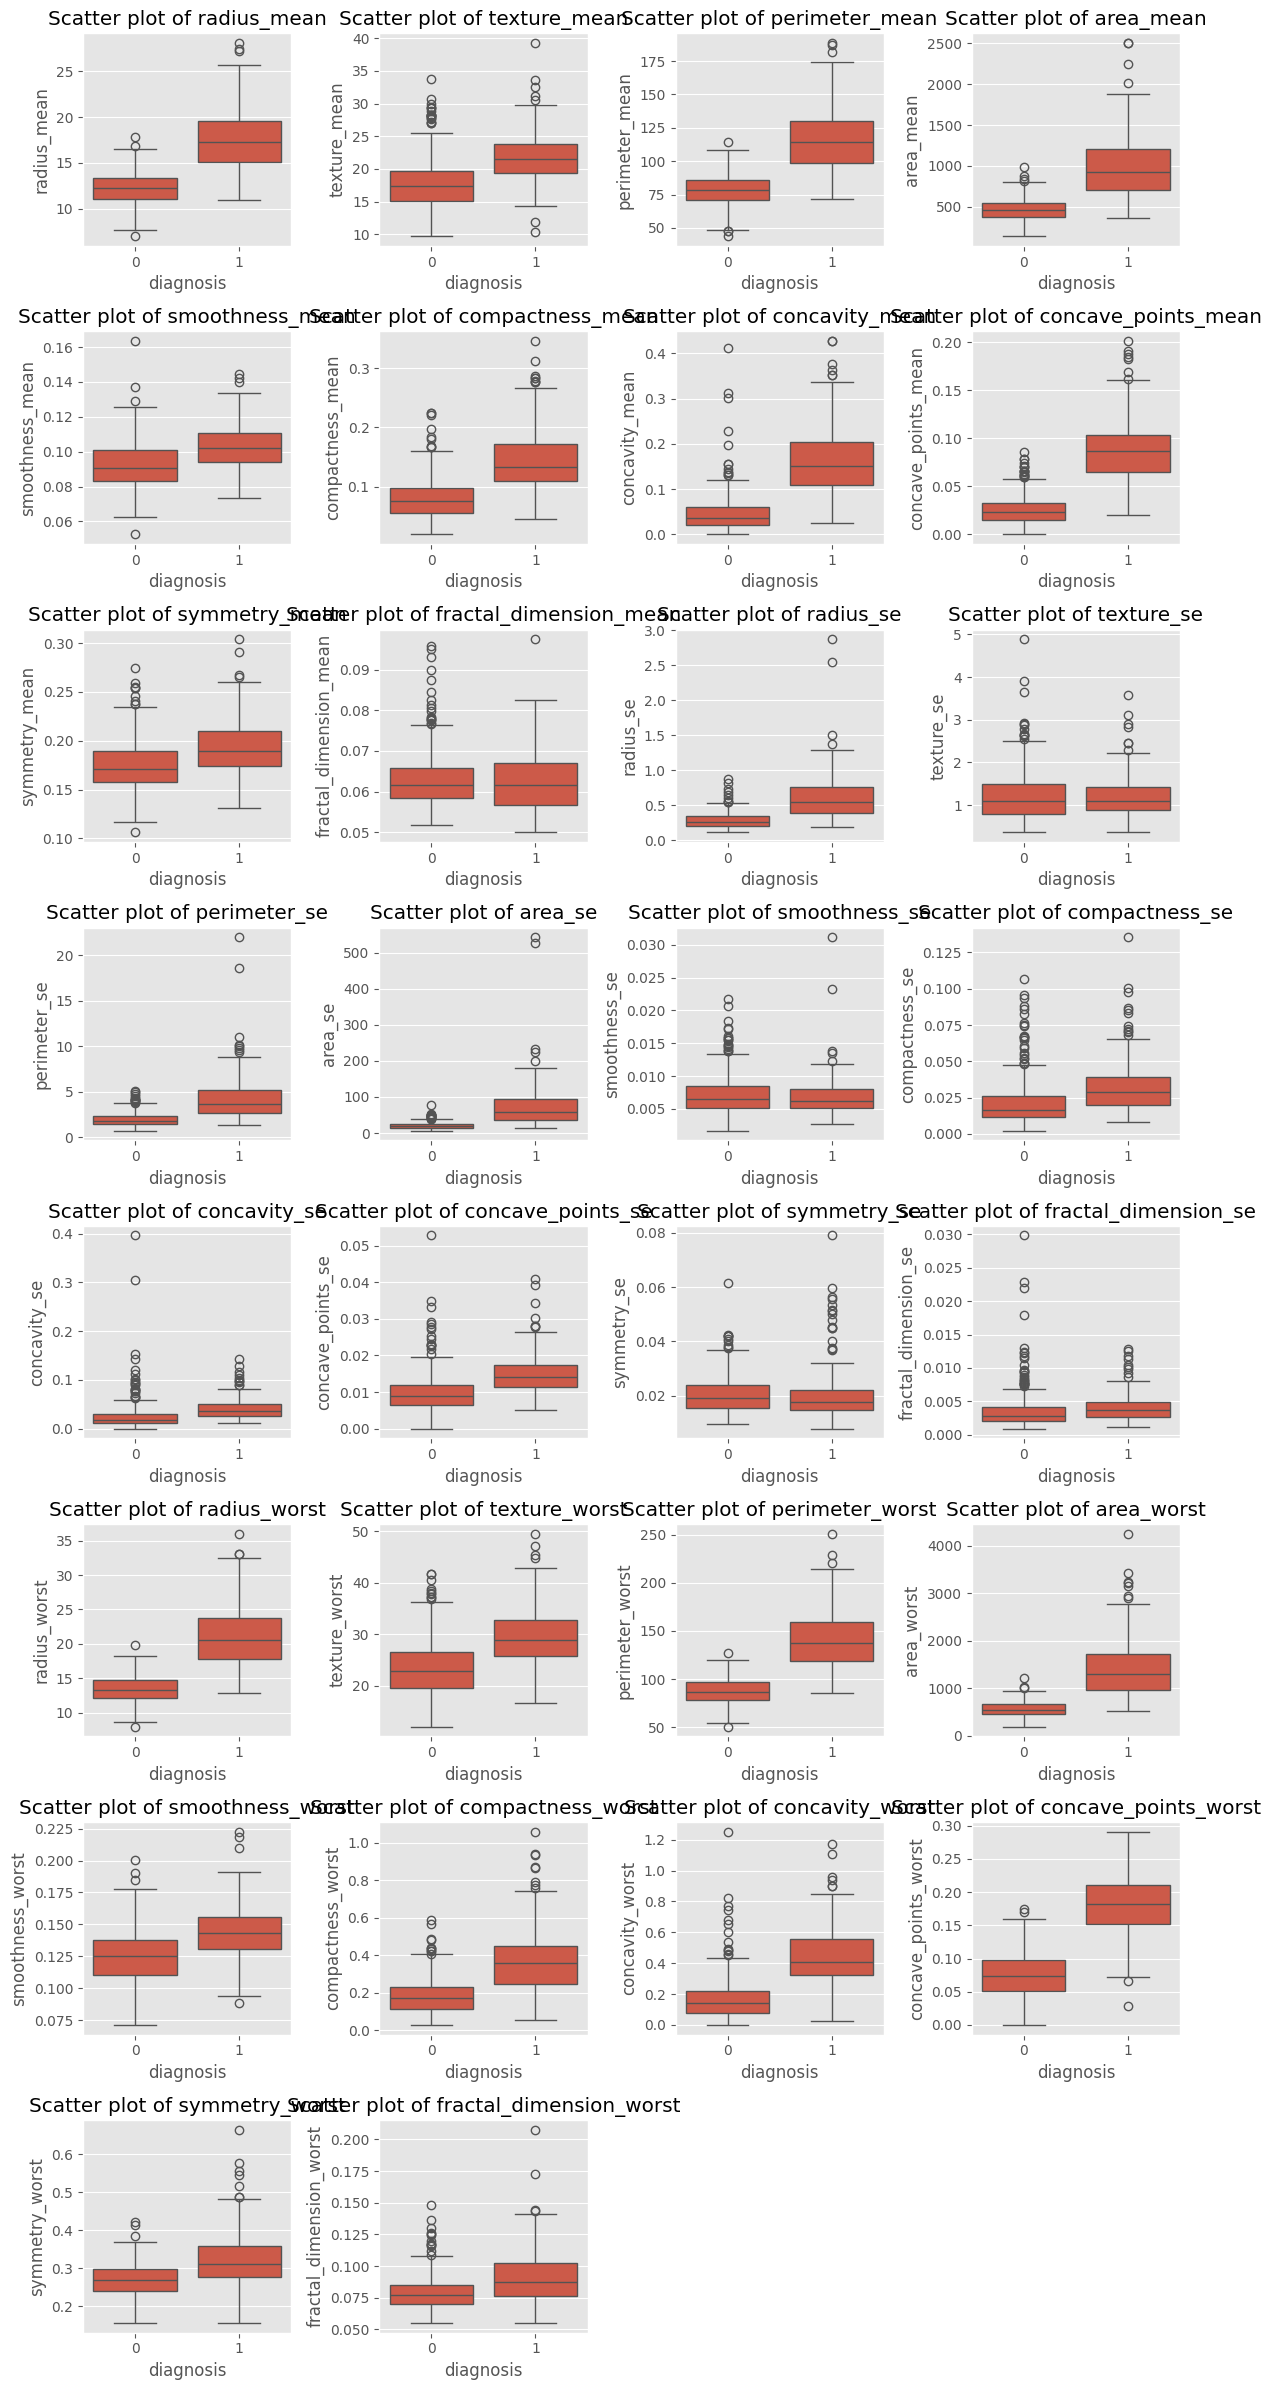

In [14]:
n_rows = 8
n_cols = 4

plt.figure(figsize=(3 * n_cols, 3 * n_rows))
for i, feature in enumerate(df.drop('diagnosis',axis=1).columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Scatter plot of {feature}')
    plt.tight_layout()

plt.show()


run correlation between x varaibles (not against diagnosis)



#### Observations from Data Exploration
- There were no null values or missing values in our dataset. 
- All the variables are numerical except the target variable. 
- If we look at the box plot of all the variables against the two target variable classes, we can clearly see seperation between the classes
- About 60% of the data is class 0 (Benign) and 40% is class 1 (Malignant). So the data is not skewed. 

# 2.Logistic Regression Model Development

- Develop a logistic regression model to predict whether cancer is malignant or benign.
- Preprocess the data as necessary (handling missing values, encoding categorical variables, etc.).
- Explain the steps you took in preparing the data and developing the model.
- You might need to encode the values for your prediction.

 Since there is possibility of multicollinearity, we will use Variation Inflation Factor to filter out some of the variables.

In [16]:
# Checking for multicollinearity

# Function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

    return vif_data
vif_data = calculate_vif(df.drop('diagnosis', axis=1))

In [61]:
## We will keep the 15 features with lowest VIF
multicollinearity_free_features = vif_data.sort_values(by='VIF')['feature'][:15].tolist()


In [62]:
multicollinearity_free_features

['texture_se',
 'smoothness_se',
 'fractal_dimension_se',
 'concavity_se',
 'symmetry_se',
 'compactness_se',
 'concave_points_se',
 'area_se',
 'concavity_worst',
 'compactness_worst',
 'concave_points_worst',
 'concave_points_mean',
 'concavity_mean',
 'symmetry_mean',
 'compactness_mean']

In [63]:
X = df[multicollinearity_free_features]
y = df['diagnosis']

In [20]:
# Fit the GLM model
full_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Calculate the R^2 value
r_squared = 1 - (full_model.deviance / full_model.null_deviance)
r_squared

0.8393980632031269

The R-squared of the full model is 0.83

In [21]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      554
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.341
Date:                Thu, 25 Jan 2024   Deviance:                       120.68
Time:                        16:30:19   Pearson chi2:                     218.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6700
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
texture_se               0.1558      0.482      0.323      0.747      -0.789       1.101
smoothness_se          170.7451    107.572      1.587      0.112     -40.092     381.583
fractal_dimension_se  -198.2682    271.427     -0.730      0.465    -730.255     333.719
concavity_se           -60.9592     59.784     -1.020      0.308    -178.133      56.215
symmetry_se             81.3549     48.377      1.682      0.093     -13.463     176.173
compactness_se         -18.5024     71.359     -0.259      0.795    -158.363     121.358
concave_points_se     -251.0554    156.115     -1.608      0.108    -557.035      54.925
area_se                  0.1565      0.029      5.338      0.000       0.099       0.214
concavity_worst         -4.9371      8.536     -0.578      0.563     -21.667      11.793
compactness_worst       17.8045     12.697      1.402      0.161      -7.080      42.689
concave_points_worst    51.4069     21.433      2.399      0.016       9.400      93.414
concave_points_mean     17.4023     42.625      0.408      0.683     -66.141     100.946
concavity_mean          80.9115     26.377      3.067      0.002      29.213     132.610
symmetry_mean          -64.5614     13.496     -4.784      0.000     -91.013     -38.110
compactness_mean       -72.9284     27.063     -2.695      0.007    -125.970     -19.886
========================================================================================
"""

## 3.Model Evaluation

- Evaluate your logistic regression model using appropriate metrics (e.g., accuracy, R^2, RMSE (all out-of-sample)).
- Split the dataset into training and testing sets to perform this evaluation.
- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [22]:
# Out of sample performance

# Train Test split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 21)
#model fitting
full_model_eval = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

In [23]:
#predicting
pred_proba = full_model_eval.predict(x_test)
y_pred = np.where(pred_proba >= 0.5, 1, 0) # classification done on 0.5 threshold.

In [24]:
## Model Evaluation
print(classification_report(y_test,y_pred))

print(f'The accuracy for the GLM model is : {accuracy_score(y_test,y_pred)}')
print(f'The precision for the GLM model is : {precision_score(y_test,y_pred)}')
print(f'The recall for the GLM model is : {recall_score(y_test,y_pred)}')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       107
           1       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

The accuracy for the GLM model is : 0.935672514619883
The precision for the GLM model is : 0.9491525423728814
The recall for the GLM model is : 0.875


- The precision for the positive class of our full model with 15 features is 0.95, which means that out of all the times we predict for a patient to be having cancer, we are correct 95% of the times.
- The recall for the same is 0.88 which means that we are still missing out on 12% of the patients who have cancer.
- But these scores are for the threshold of 0.5 when classifying. We can use the AUC curve to figure out the appropriate borderline. 

In [65]:
## AUC Curve

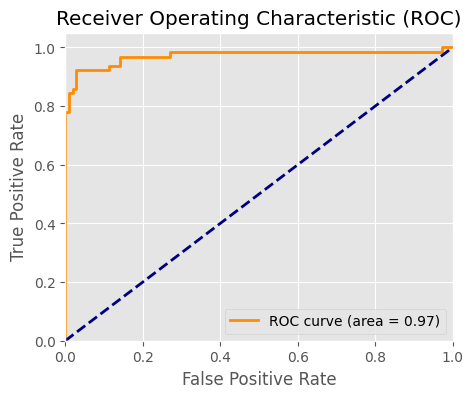

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Insights

- Our model has ROC of 0.97 which shows it could distinguish between positive and negative classes very well.

- Here we the aim is to reduce our false positive rate as much as we can without loosing true positive rate. 
- In the case of cancer patient detection, the aim is not to miss any cancer patients even though we loose some accuracy. 
- That means, we should be sacrificing precision to our recall as close as possible to 1.
- For this we should be reducing the threshold for classification.

## 4.Testing Interactions Between Features

- Explore and test the interactions between different features in the dataset. Pay particular attention to interactions involving both categorical/dummy and continuous variables.
- For this excercise, use a linear regression rather than a logistic regression model.
- Discuss issues that occur when using a linear regression model to predict binary outcomes.
- Create and analyze interaction terms involving categorical/dummy variables (such as 'diagnosis' converted into a dummy variable) and continuous variables (like 'radius_mean' or 'texture_mean').
- Fit a regression model that includes interaction terms, for example, between 'diagnosis' and 'radius_mean', and between 'diagnosis' and 'texture_mean'.
- Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.

In [27]:
# Preparing the dataset for linear regression
df_lr = df[multicollinearity_free_features]
df_lr['diagnosis'] = y

/var/folders/ly/npw69p7x4lg1l7s7mm3y7twm0000gn/T/ipykernel_87007/1607822510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['diagnosis'] = y


In [28]:
df_lr.head()

,texture_se,smoothness_se,fractal_dimension_se,concavity_se,symmetry_se,compactness_se,concave_points_se,area_se,concavity_worst,compactness_worst,concave_points_worst,concave_points_mean,concavity_mean,symmetry_mean,compactness_mean,diagnosis
0,0.9053,0.006399,0.006193,0.05373,0.03003,0.04904,0.01587,153.40,0.7119,0.6656,0.2654,0.14710,0.3001,0.2419,0.27760,1
1,0.7339,0.005225,0.003532,0.01860,0.01389,0.01308,0.01340,74.08,0.2416,0.1866,0.1860,0.07017,0.0869,0.1812,0.07864,1
2,0.7869,0.006150,0.004571,0.03832,0.02250,0.04006,0.02058,94.03,0.4504,0.4245,0.2430,0.12790,0.1974,0.2069,0.15990,1
3,1.1560,0.009110,0.009208,0.05661,0.05963,0.07458,0.01867,27.23,0.6869,0.8663,0.2575,0.10520,0.2414,0.2597,0.28390,1
4,0.7813,0.011490,0.005115,0.05688,0.01756,0.02461,0.01885,94.44,0.4000,0.2050,0.1625,0.10430,0.1980,0.1809,0.13280,1


In [29]:
## we will pick two numerical variables to interact with our dummy variable 'diagnosis'
# area_se
# compactness_mean

In [78]:
## Running a Linear regression model on these two selected interaction terms and the predictor column - diagnosis


lr_model_inteaction =smf.ols(formula='diagnosis~area_se +compactness_mean+area_se:diagnosis + compactness_mean:diagnosis' ,data=df_lr).fit()

In [79]:
lr_model_inteaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          3.27e-271
Time:                        23:46:48   Log-Likelihood:                 240.05
No. Observations:                 569   AIC:                            -470.1
Df Residuals:                     564   BIC:                            -448.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4159      0.021     20.038      0.000       0.375       0.457
area_se                       -0.0090      0.001     -9.941      0.000      -0.011      -0.007
compactness_mean              -2.3244      0.237     -9.813      0.000      -2.790      -1.859
area_se:diagnosis              0.0097      0.001     10.641      0.000       0.008       0.011
compactness_mean:diagnosis     5.5349      0.234     23.655      0.000       5.075       5.994
==============================================================================
Omnibus:                       13.792   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.579
Skew:                           0.237   Prob(JB):                     9.24e-05
Kurtosis:                       3.748   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


- We get R squared of 0.89, indicating the model is good at making prediction. 

- Using a linear regression model to predict binary outcomes is problematic as the model cannot fit the data as linear regression assumes a continuous outcome variable and for logistic the outcomes are in binary.
- Due to using Linear Regression, the p-values are unstable, also the AIC and BIC values are negative.
- The interaction terms are useful to the model since they have significant p-values.

#### Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.

## 5. Feature Selection and Cross-Validation: Full vs. Reduced Model

- Create a reduced model using only a subset of significant predictors. You can use methods like FDR Cutoff, forward selection, backward elimination, or any other appropriate feature selection technique.
- Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 10-fold cross-validation.
- Evaluate the out-of-sample performance for both models across folds and discuss which model performs better and why.



In [32]:
# Fitting the full model
full_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Calculate the R^2 value
r_squared = 1 - (full_model.deviance / full_model.null_deviance)
r_squared

0.8393980632031269

### FDR Method for feature selection

smoothness_se           1.124532e-01
fractal_dimension_se    4.651052e-01
concavity_se            3.078881e-01
symmetry_se             9.263157e-02
compactness_se          7.954135e-01
concave_points_se       1.078041e-01
area_se                 9.373334e-08
concavity_worst         5.629930e-01
compactness_worst       1.608246e-01
concave_points_worst    1.646085e-02
concave_points_mean     6.830786e-01
concavity_mean          2.158756e-03
symmetry_mean           1.720952e-06
compactness_mean        7.043490e-03
dtype: float64


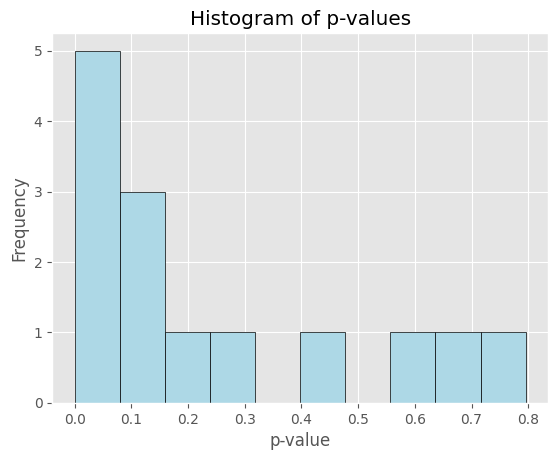

In [33]:
# Extract p-values from the model summary, excluding the intercept
p_values = full_model.pvalues[1:]
print(p_values)
p_values.shape

# Plot the histogram of p-values
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()


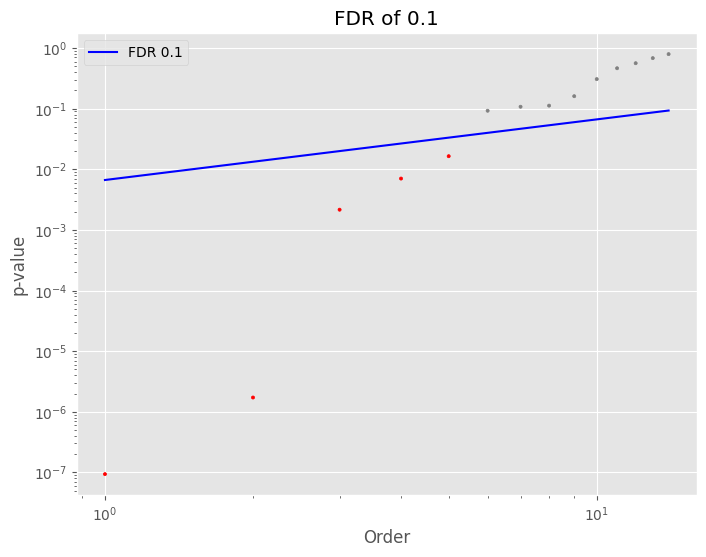

Threshold p-value at 10% FDR: 0.0165


In [51]:
def fdr_cut(pvals, q=0.1):
    """
    Determine the threshold p-value at a given FDR level and plot the p-values.

    Parameters:
        pvals (list or array): A list or array of p-values.
        q (float): The desired FDR level.

    Returns:
        float: The threshold p-value at the given FDR level.
    """
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1))

    # Plot the p-values
    plt.figure(figsize=(8, 6))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()

    return alpha

# Apply the function on the extracted p-values
threshold = fdr_cut(p_values)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")

In [71]:
significant_predictors = p_values[p_values < 0.0165].index.tolist()
significant_predictors

['area_se',
 'concave_points_worst',
 'concavity_mean',
 'symmetry_mean',
 'compactness_mean']

- So we are selection the 5 features above to create the reduced model

In [72]:

## Fitting the Reduced model
X_reduced = X[significant_predictors]
reduced_model = sm.GLM(y, X_reduced, family=sm.families.Binomial()).fit()
## Calculate the R^2 value
r_squared = 1 - (reduced_model.deviance / reduced_model.null_deviance)
r_squared

0.7434552797519978

In [73]:
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      564
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.389
Date:                Thu, 25 Jan 2024   Deviance:                       192.78
Time:                        23:12:36   Pearson chi2:                     257.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6254
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
area_se                  0.1015      0.017      6.023      0.000       0.069       0.135
concave_points_worst    69.0644      9.250      7.467      0.000      50.935      87.194
concavity_mean           7.7778      4.852      1.603      0.109      -1.731      17.287
symmetry_mean          -60.2926      6.653     -9.062      0.000     -73.332     -47.253
compactness_mean       -19.2090      8.738     -2.198      0.028     -36.336      -2.082
========================================================================================
"""

Observation 
-  The full model has a R-square of 0.839 vs the reduced model has 0.74. This is natural since we dropped the number of variables from 15 to 5

Let's compare how these models perform out of sample in terms of accuracy score and using cross validation method

#### Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 10-fold cross-validation.

In [55]:
## CV for full model 

logreg = LogisticRegression()
# Perform 10-fold cross-validation and compute the accuracy
cv_scores_full = cross_val_score(logreg, X, y, cv=10)

# Compute the average of the cross-validation scores
average_accuracy = np.mean(cv_scores_full)

print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9157268170426063


In [64]:
## CV for reduced model 
logreg = LogisticRegression()
# Perform 10-fold cross-validation and compute the accuracy
cv_scores_reduced = cross_val_score(logreg, X_reduced, y, cv=10)

# Compute the average of the cross-validation scores
average_accuracy = np.mean(cv_scores_reduced)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.8911027568922305


In [41]:
cv_scores_full

array([0.92982456, 0.84210526, 0.89473684, 0.9122807 , 0.9122807 ,
       0.92982456, 0.9122807 , 0.94736842, 0.9122807 , 0.96428571])

In [42]:
cv_scores = pd.DataFrame(cv_scores_full,cv_scores_reduced).reset_index()
cv_scores = cv_scores.rename(columns={'index':'reduced_model', 0:'full_model'})

<Axes: >

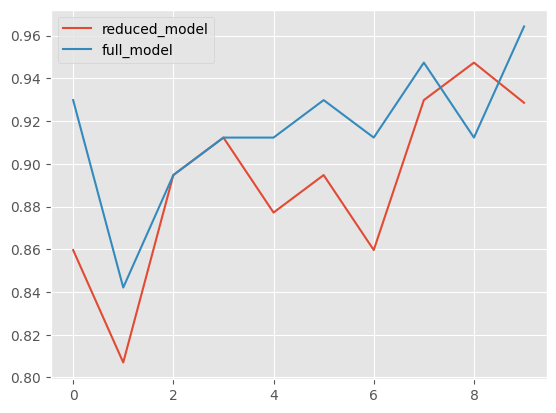

In [74]:
## Comparing the accuracy scores across the folds
cv_scores.plot(kind='line')

<Axes: >

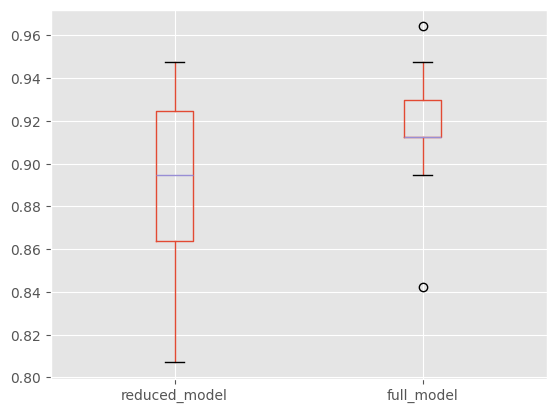

In [75]:
cv_scores.boxplot()

Observations 

- We can see that the on average the full model has a higher accuracy than the reduced model.
- The mean accuracy score for full model is 0.91
- The mean accuracy score for the reduced model is 0.89
- Even after dropping 10 out of the 15 variables our model accuracy didn't drop much.
- We can consider the reduced model as our final model since we would want to keep our model simple without loosing performance (principle of parsimony)

- Also, using the cross validation we can say how our model will perform generally over unseen data. 